In [1]:
%pylab inline
%matplotlib inline

import os
os.chdir("/Users/Bya/git/predictEPL/MyFunctions/")
from dataIO import csv_dic_df

import time
import collections
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/Users/Bya/git/predictEPL/utils/")
sys.path.append("/Users/Bya/git/predictEPL/config/")
sys.path.append("/Users/Bya/git/predictEPL/WebScrapping/")

import paths
import espn_urls
import my_plot
import scrap_espn_gamecast
import emolex

import useful_methods
from useful_methods import FolderFiles
from useful_methods import csv_dic_df
from useful_methods import FilterDF
from useful_methods import PreprocessingTweet

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read Emolex
dic_emolex, dic_emolex_stemmed = emolex.EmolexDic()

# Read Soccer Emolex
dic_emolex_soccer, dic_emolex_stemmed_soccer = emolex.EmolexSoccerDic()

All Words: 14182
All Words: 14163


In [29]:
# choosing data
week = str(13)
GW = 'GW' + week
filenames = FolderFiles(GW + '/SingleGames', paths.READ_PATH_EXTRACTED_CSV, ends='.csv')
filenames

['Chelsea_vs_Norwich.csv',
 'City_vs_Liverpool.csv',
 'Crystal_vs_Sunderland.csv',
 'Everton_vs_Villa.csv',
 'Newcastle_vs_Leicester.csv',
 'Southampton_vs_Stoke.csv',
 'Swansea_vs_Bournemouth.csv',
 'Tottenham_vs_WestHam.csv',
 'WestBromwich_vs_Arsenal.csv']

In [30]:
# Set Game
filename = filenames[1]

# Read DF
os.chdir(paths.READ_PATH_EXTRACTED_CSV + GW + '/SingleGames')
df = csv_dic_df(filename)

start_time = time.time()

# [Filter] DF
dfFilter = FilterDF(df)

# # [Filtered] All, Non-Retweet
# dfFilterEmolex = emolex.CreateEmolexDF(dfFilter, dic_emolex, dic_emolex_stemmed)
# dfFilterEmolexNonRetweet = emolex.CreateEmolexDF(dfFilter[dfFilter['status'] != 'retweet'], dic_emolex, dic_emolex_stemmed)

# # [Filtered] Home, Away
dfFilterEmolexSoccerHome = emolex.CreateEmolexDF(dfFilter[dfFilter['side'] == 'home'], dic_emolex_soccer, dic_emolex_stemmed_soccer)
dfFilterEmolexSoccerAway = emolex.CreateEmolexDF(dfFilter[dfFilter['side'] == 'away'], dic_emolex_soccer, dic_emolex_stemmed_soccer)

# # [Filtered, Non ReTweet] Home, Away
# dfFilterEmolexNonRtHome = emolex.CreateEmolexDF(dfFilter[(dfFilter['side'] == 'home') & (dfFilter['status'] != 'retweet')], dic_emolex, dic_emolex_stemmed)
# dfFilterEmolexNonRtAway = emolex.CreateEmolexDF(dfFilter[(dfFilter['side'] == 'away') & (dfFilter['status'] != 'retweet')], dic_emolex, dic_emolex_stemmed)

# [Filtered, Non ReTweet] Home, Away
dfFilterEmolexSoccerNonRtHome = emolex.CreateEmolexDF(dfFilter[(dfFilter['side'] == 'home') & (dfFilter['status'] != 'retweet')], dic_emolex_soccer, dic_emolex_stemmed_soccer)
dfFilterEmolexSoccerNonRtAway = emolex.CreateEmolexDF(dfFilter[(dfFilter['side'] == 'away') & (dfFilter['status'] != 'retweet')], dic_emolex_soccer, dic_emolex_stemmed_soccer)

print("[Done]: %.2f" % (time.time() - start_time))

[Done]: 48.04


In [31]:
# Scrap Gamecast
url = espn_urls.MatchUrl(GW, filename)
dfGameCast = scrap_espn_gamecast.CreateEspnLiveCommentDF(url)

# Create Goal, Attack, Foul dics
goals_dic, attacks_dic_home, attacks_dic_away, fouls_dic_home, fouls_dic_away = scrap_espn_gamecast.CreateGAFdics(dfGameCast)

[Match]: Manchester City VS Liverpool
[Scrap Done]: 1.62 sec


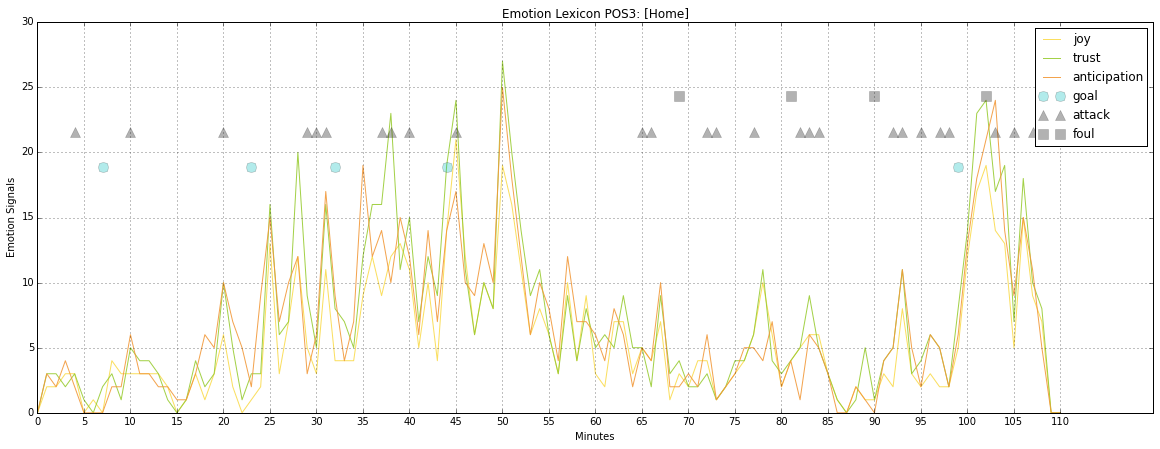

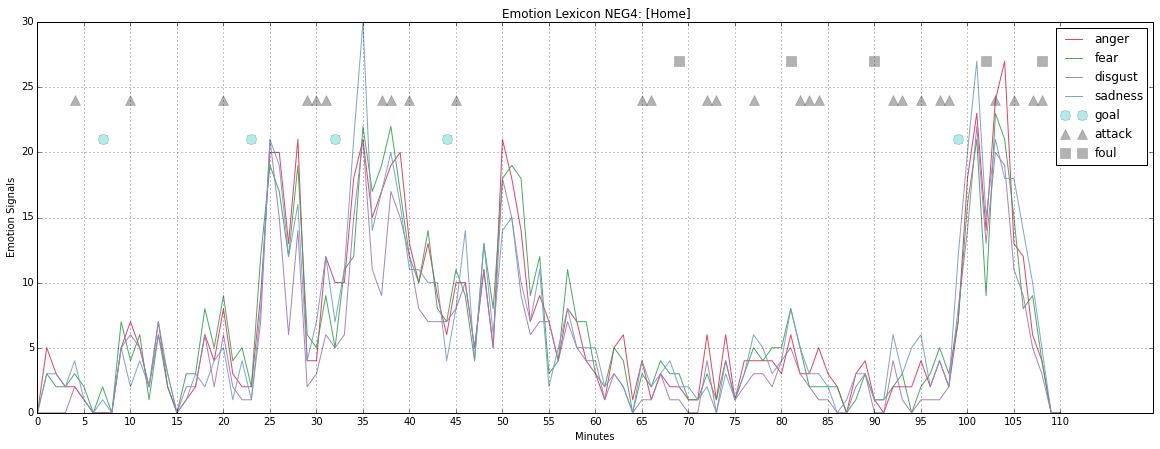

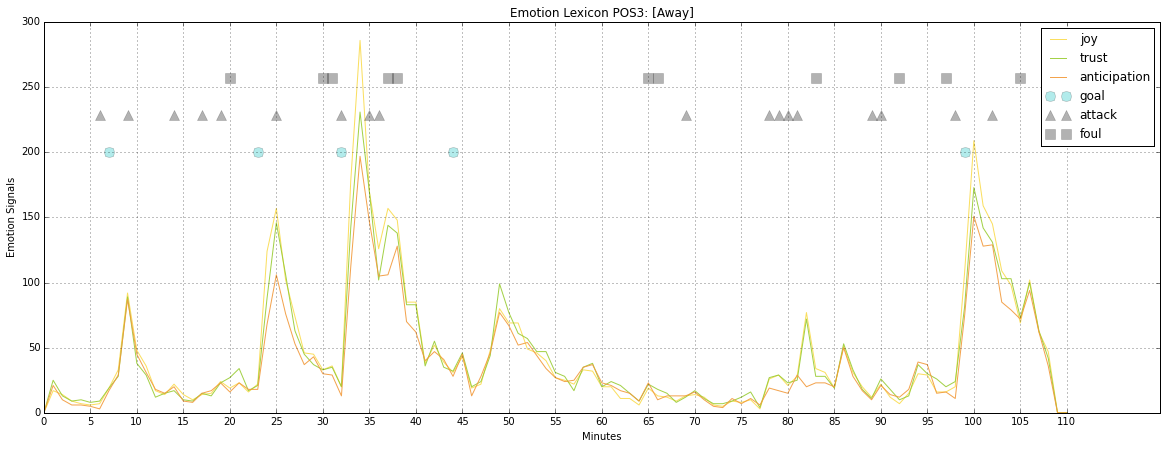

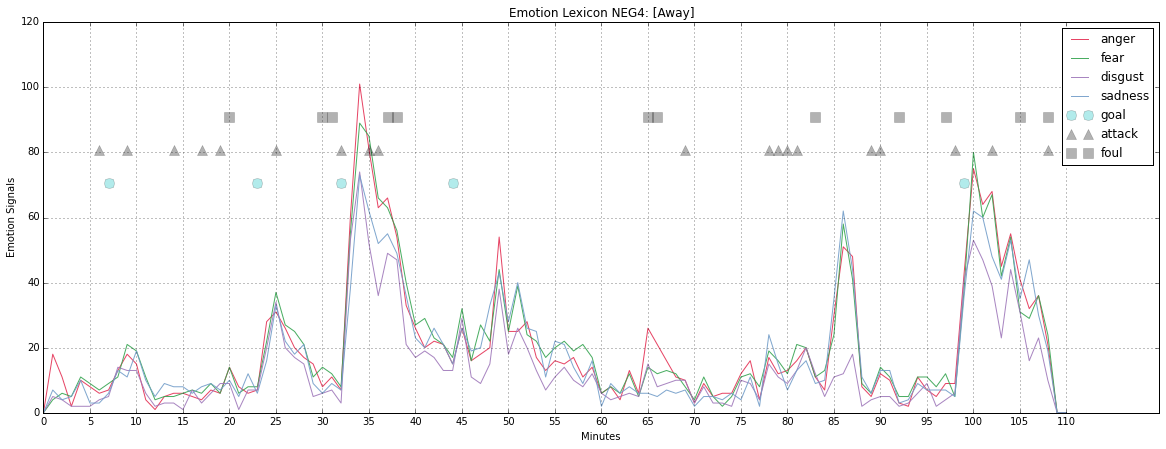

In [32]:
my_plot.Pos3Neg4(dfFilterEmolexSoccerNonRtHome, goals_dic, attacks_dic_home, fouls_dic_home, title='Home')
my_plot.Pos3Neg4(dfFilterEmolexSoccerNonRtAway, goals_dic, attacks_dic_away, fouls_dic_away, title='Away')

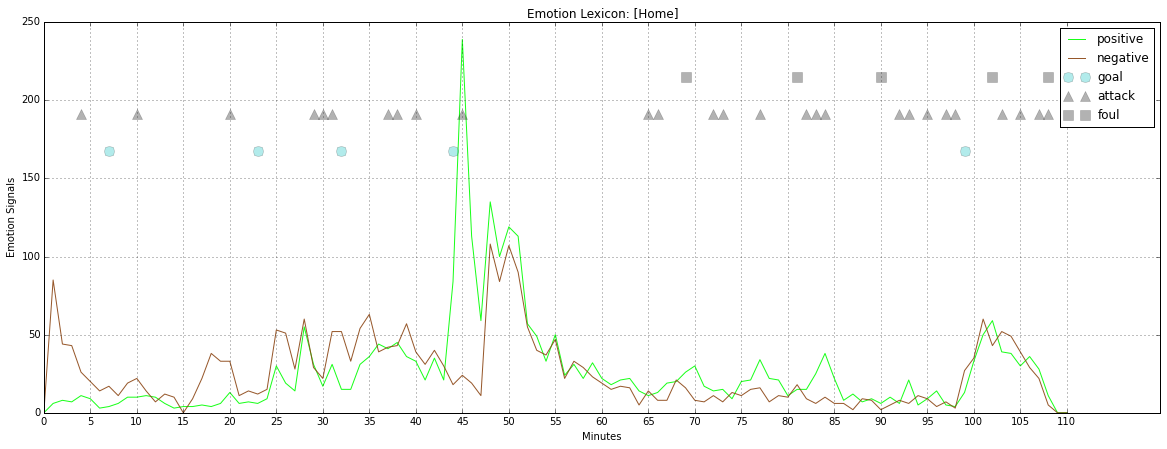

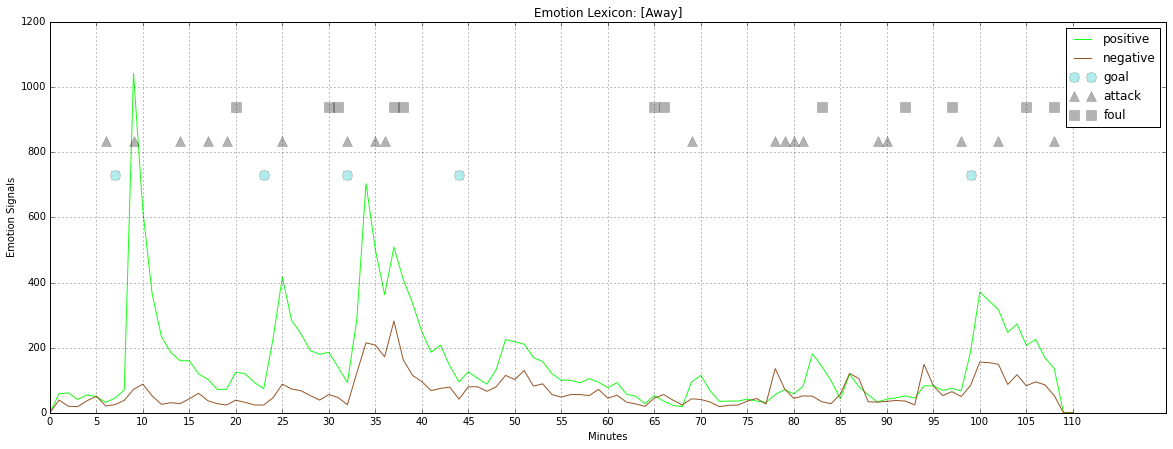

In [33]:
my_plot.EmolexCats(dfFilterEmolexSoccerHome, ['positive', 'negative'], goals_dic, attacks_dic_home, fouls_dic_home, 'Home')
my_plot.EmolexCats(dfFilterEmolexSoccerAway, ['positive', 'negative'], goals_dic, attacks_dic_away, fouls_dic_away, 'Away')

# my_plot.EmolexCats(dfFilterEmolexSoccerNonRtAway, ['positive', 'negative'], goals_dic, attacks_dic_away, fouls_dic_away, 'Away')

# Words Examination

In [34]:
# Set minute and side
start_minute = 32
end_minute = 37
side = 'away'

dfExamine = dfFilter.copy()
dfExamine['ith_minute'] = [int(ith_minte) for ith_minte in dfExamine['ith_minute']]

# extract tweets
tweets = list(dfExamine[
        (dfExamine['side'] == side) &
        (dfExamine['status'] != 'retweet') &
        (dfExamine['ith_minute'] >= start_minute) &
        (dfExamine['ith_minute'] <= end_minute)
    ]['text'])

print("[Tweets Number]: %s\n" % len(tweets))

# Create words lists. PreprocessingTweet
start_time = time.time()
all_words = []
all_words_stemmend = []
for tweet in tweets:
    words, words_stemmed = PreprocessingTweet(tweet)
    all_words += words
    all_words_stemmend += words_stemmed

print("[All Words]: %s" % (len(all_words)))
print("[Unique Words]: %s\n" % (len(set(all_words))))

print("[Most Common 10 Words]:")
useful_methods.ShowMostCommon(all_words)
print("\n")

print("[Emolex Words Count]:")
pprint(emolex.CountEmolexWords(dic_emolex_soccer, dic_emolex_stemmed_soccer, all_words, all_words_stemmend))
print("\n")


print("[Passed Time]: %.2f sec" % (time.time() - start_time))

[Tweets Number]: 3648

[All Words]: 24212
[Unique Words]: 3186

[Most Common 10 Words]:
[('lfc', 3673),
 ('3-0', 498),
 ('goal', 491),
 ('ynwa', 462),
 ('firmino', 449),
 ('liverpool', 431),
 ('http', 360),
 ('@', 356),
 ('city', 275),
 ('coutinho', 223)]


[Emolex Words Count]:
{'anger': 378,
 'anticipation': 680,
 'disgust': 267,
 'fear': 366,
 'joy': 937,
 'negative': 710,
 'positive': 1496,
 'sadness': 287,
 'surprise': 310,
 'trust': 809}


[Passed Time]: 1.91 sec


In [35]:
cat = 'joy'

emolex_words = emolex.EmolexWords(dic_emolex_soccer, dic_emolex_stemmed_soccer, all_words, all_words_stemmend)

cat_words = emolex_words[cat]
useful_methods.ShowMostCommon(cat_words, 20)
len(cat_words)

[('brilliant', 109),
 ('beautiful', 104),
 ('good', 79),
 ('love', 63),
 ('god', 55),
 ('fire', 50),
 ('loving', 46),
 ('happy', 25),
 ('outstanding', 22),
 ('beauty', 20),
 ('sensational', 19),
 ('winning', 18),
 ('orgasm', 17),
 ('hope', 13),
 ('fun', 13),
 ('finally', 10),
 ('wonderful', 10),
 ('lovely', 10),
 ('enjoying', 10),
 ('joy', 9)]


937

In [24]:
dic_emolex['deserve']

{'anger': 1,
 'anticipation': 1,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 1,
 'sadness': 0,
 'surprise': 0,
 'trust': 1}

In [36]:
for tweet in tweets:
    if 'brilliant' in tweet:
        print(tweet, '\n--------\n')

All I can hear at the Etihad is All Round the Fields of Anfield Road and it's brilliant. #LFC 
--------

Absolutely brilliant stuff! #LFC 
--------

Missed the first 25 mins because of the snow storm and trying to clear the driveway for my parents. This is brilliant football. #LFC 
--------

Now what a brilliant goal that was!!! #LFC 
--------

Brilliant. Absolutely brilliant goal - Man City cut to shreds - 0-3 #LFC 
--------

This is absolutely brilliant #LFC 
--------

Just brilliant #LFC 
--------

That was class 😂⚽️ brilliant #lfc #ynwa 
--------

This is brilliant #LFC 
--------

Firmino GOALLL!!!!!! 👏 👏 👏 brilliant play #LFC 
--------

Bloody brilliant!!! #LFC 
--------

G'WONNN This is fucking brilliant!!! 😂👏🏻🙌🏻 #LFC #YNWA 
--------

Fuckin brilliant!! What a team goal! #lfc #ynwa 
--------

What a brilliant goal! #LFC 
--------

Simply brilliant. #Firmino #LFC 
--------

What a brilliant goal! #LFC #YNWA 
--------

Absolutely brilliant football #lfc 
--------

That's fucking br